In [1]:
#Importação de bibliotecas
import torch
import numpy

import pandas               as pd
import torch.nn.functional  as F
import matplotlib.pyplot    as plt
import plotly.graph_objects as go
import plotly.express       as px
import cv2                  as cv 

from PIL                     import Image
from torch                   import nn, optim
from torchvision             import datasets, transforms as T
from plotly.subplots         import make_subplots
from google.colab            import drive

print("Versão:",torch.__version__)

Versão: 1.10.0+cu111


In [2]:
#Leituras de arquivo do drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#Modelo de arquitetura da CNN
class classificador(nn.Module):
    def __init__ (self):
        super().__init__()
      
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=10, stride=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2, stride=1, padding=2)

        self.activation = nn.ReLU() 
        self.bnorm = nn.BatchNorm2d(num_features=64)
        self.pool = nn.MaxPool2d(kernel_size=(2,2))
        
        self.flatten = nn.Flatten()
        
        self.linear1 = nn.Linear(in_features=16384, out_features=256)
        self.linear2 = nn.Linear(in_features=256, out_features=128)
        self.linear3 = nn.Linear(in_features=128, out_features=64)
        self.output = nn.Linear(in_features=64, out_features=4)

        self.dropout1 = nn.Dropout(p = 0.1)
        self.dropout2 = nn.Dropout(p = 0.2)
        
    def forward(self, X):
        X = self.pool(self.bnorm(self.activation(self.conv1(X))))
        X = self.dropout1(self.pool(self.activation(self.conv2(X))))
        X = self.dropout2(self.pool(self.activation(self.conv3(X))))
        X = self.flatten(X)
        
        X = self.activation(self.linear1(X))
        X = self.activation(self.linear2(X))
        X = self.activation(self.linear3(X))
        X = self.output(X)
        
        return X

In [4]:
path_traino = '/content/gdrive/MyDrive/MRI_TUMOR_CNN/Dataset80_20BrainTumor/Treino'
path_teste = '/content/gdrive/MyDrive/MRI_TUMOR_CNN/Dataset80_20BrainTumor/Teste'

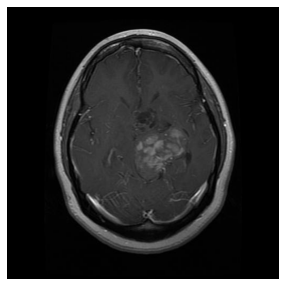

In [5]:
imagem = '/content/gdrive/MyDrive/MRI_TUMOR_CNN/Dataset80_20BrainTumor/Treino/glioma_tumor/glioma (101).jpg'
plt.figure(figsize=(5,5))
plt.axis("off")
plt.imshow(cv.imread(imagem))

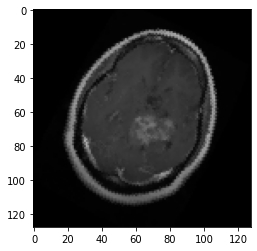

In [6]:
transform = T.Compose(
    [
     T.ToPILImage(),
     T.Resize([128,128]),
     T.RandomRotation(45),
    ]
)

agmentation_image = transform(img = cv.imread(imagem))
plt.imshow(agmentation_image)

In [7]:
transform_traino = T.Compose(
    [
     T.Resize([128,128]),
     T.RandomHorizontalFlip(),
     T.RandomRotation(45),
     T.ToTensor(),
    ]
)

In [8]:
transform_teste = T.Compose(
    [
     T.Resize([128,128]),
     T.ToTensor(),
    ]
)

In [9]:
traino_dataset = datasets.ImageFolder(path_traino, transform=transform_traino)
teste_dataset = datasets.ImageFolder(path_teste, transform=transform_teste)

In [10]:
loader_treino = torch.utils.data.DataLoader(traino_dataset, batch_size=32, shuffle=True)
loader_teste = torch.utils.data.DataLoader(teste_dataset, batch_size=32)

In [11]:
''''def get_class_distribution(dataset_obj):
  count_dict = {k:0 for k, v in dataset_obj.class_to_idx.items()}
  for i in dataset_obj:
    y_labels = i[1]
    y_labels = idx2class[y_labels]
    count_dict[y_labels] += 1
  return count_dict

idx2class = {v: k for k, v in traino_dataset.class_to_idx.items()}
df_treino = pd.DataFrame.from_dict([get_class_distribution(traino_dataset)]).melt()

idx2class = {v: k for k, v in teste_dataset.class_to_idx.items()}
df_teste = pd.DataFrame.from_dict([get_class_distribution(teste_dataset)]).melt()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(
    labels=df_treino['variable'],
     values=df_treino['value'],
      pull=[0, 0, 0.1, 0]),
       1, 1)

fig.add_trace(go.Pie(
    labels=df_teste['variable'],
     values=df_teste['value'],
      pull=[0, 0, 0.1, 0]),
       1, 2)

fig.update_traces(hole=.4,
    hoverinfo='label+percent',
                  textinfo='value',
                  textfont_size=12.5,
                  marker=dict(
                      line=dict(
                          color='#000000',
                           width=1)
                      )
                  )

fig.update_layout(
    title_text = 'Proporção da base de dados de treino e teste',
)

fig.show()'''

"'def get_class_distribution(dataset_obj):\n  count_dict = {k:0 for k, v in dataset_obj.class_to_idx.items()}\n  for i in dataset_obj:\n    y_labels = i[1]\n    y_labels = idx2class[y_labels]\n    count_dict[y_labels] += 1\n  return count_dict\n\nidx2class = {v: k for k, v in traino_dataset.class_to_idx.items()}\ndf_treino = pd.DataFrame.from_dict([get_class_distribution(traino_dataset)]).melt()\n\nidx2class = {v: k for k, v in teste_dataset.class_to_idx.items()}\ndf_teste = pd.DataFrame.from_dict([get_class_distribution(teste_dataset)]).melt()\n\nfig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])\n\nfig.add_trace(go.Pie(\n    labels=df_treino['variable'],\n     values=df_treino['value'],\n      pull=[0, 0, 0.1, 0]),\n       1, 1)\n\nfig.add_trace(go.Pie(\n    labels=df_teste['variable'],\n     values=df_teste['value'],\n      pull=[0, 0, 0.1, 0]),\n       1, 2)\n\nfig.update_traces(hole=.4,\n    hoverinfo='label+percent',\n                  textinfo='v

In [12]:
net = classificador()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [13]:
#Setamos a GPU necessária para realizar nossa classificação
device = torch.device("cuda") if torch.cuda.is_available else torch.device("cpu")
print(device,"\n")

net.to(device)

cuda 



classificador(
  (conv1): Conv2d(3, 64, kernel_size=(10, 10), stride=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
  (activation): ReLU()
  (bnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=16384, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=4, bias=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.2, inplace=False)
)

In [14]:
loss_values = []
accu_values = []
def training_loop(loader, epoch):
    running_loss = 0.
    running_accuracy = 0.
    for i, data in enumerate(loader):
        
        inputs, labels = data
        
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        #loss_values.append(running_loss / len(train_dataset))
        
        ps = F.softmax(outputs, dim=1)
        top_p, top_class = ps.topk(k=1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        
        accuracy= torch.mean(equals.type(torch.float))
        
        running_accuracy += accuracy
        
        #Imprimir os dados referentes a este loop
        print("Época {:3d} - Loop {:3d} de {:3d}: perda {:03.2f} - precisão {:03.2f}".format(epoch + 1, i+1, len(loader)\
                                                                                             , loss, accuracy), end= '\r')
    #Impressão referente à épocas
    print("Época {:3d}: perda {:.5f} - precisão {:.5f}".format(epoch+1, running_loss/len(loader)\
                                                                         ,running_accuracy/len(loader)))
    loss_values.append(running_loss / len(loader))
    accu_values.append(running_accuracy/len(loader))

In [15]:
loss_train = [item for item in loss_values]
accu_train = [item for item in accu_values]

In [ ]:
print("Treinando...")
for epoch in range(500):
    training_loop(loader_treino, epoch)
    net.eval()
    net.train()

Treinando...
Época   1: perda 1.38856 - precisão 0.26265
Época   2: perda 1.38235 - precisão 0.27569
Época   3: perda 1.37643 - precisão 0.27965
Época   4: perda 1.37049 - precisão 0.30046
Época   5: perda 1.36392 - precisão 0.36623
Época   6: perda 1.35710 - precisão 0.40564
Época   7: perda 1.34862 - precisão 0.42370
Época   8: perda 1.33889 - precisão 0.44703
Época   9: perda 1.32794 - precisão 0.45762
Época  10: perda 1.31433 - precisão 0.47325
Época  11: perda 1.29690 - precisão 0.47180
Época  12: perda 1.27658 - precisão 0.47591
Época  13: perda 1.24824 - precisão 0.48163
Época  14: perda 1.21728 - precisão 0.49108
Época  15: perda 1.18407 - precisão 0.48643
Época  16: perda 1.14907 - precisão 0.49405
Época  17: perda 1.11655 - precisão 0.50915
Época  18: perda 1.07929 - precisão 0.52774
Época  19: perda 1.04897 - precisão 0.55831
Época  20: perda 1.01839 - precisão 0.58377
Época  21: perda 0.98545 - precisão 0.58559
Época  22: perda 0.96393 - precisão 0.59848
Época  23: perda 0.

In [ ]:
loss_train = [item for item in loss_values]
accu_train = [item for item in accu_values]
print(len(loss_train), len(accu_train))

In [ ]:
accu_values.clear()
loss_values.clear()
print("Validando...")
for epoch in range(500):
    net.eval()
    training_loop(loader_teste, epoch)
    net.train()

In [ ]:
loss_test = [item for item in loss_values]
accu_test = [item for item in accu_values]

In [ ]:
print(len(loss_test), len(accu_test))

In [ ]:
epochs_x = range(1, len(loss_test) + 1)
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_train, 'bo', label='Training loss')
plt.plot(epochs_x, loss_test, 'b', label='Testing loss')
plt.title('Training and Testing Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(2,1,2)
plt.plot(epochs_x, accu_train, 'bo', label='Training acc')
plt.plot(epochs_x, accu_test, 'b', label='Testing acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
numero_de_classes = 4

matriz = torch.zeros(numero_de_classes, numero_de_classes)
with torch.no_grad():
  for i, (inputs, classes) in enumerate(loader_teste):
    inputs = inputs.to(device)
    outputs = net(inputs)
    _, previsao = torch.max(outputs, 1)
    for k, l in zip(classes.view(-1), previsao.view(-1)):
      matriz[k.long(), l.long()] += 1

In [ ]:
print(matriz)

In [ ]:
print(matriz.diag()/matriz.sum(1))